# Introduccion

Bienvenido al modulo dos muchacho espero que no hayas tenido problemas con el modulo anterior :smile:. Pero tranquilo este modulo es bastante mas simple que el anterior y es mas complentario que otra cosa.

El proposito del modulo en cuestion como su nombre lo indica es el de la descarga de los datos suplementarios de los samples, que como recordaras es de nuestro interes debido a que si bien GEOparse te permite acceder a la matriz de conteos almacenada en los archivos SOFT pero estos suelen estar procesados de alguna manera :cat:

# Codigo

In [1]:
# Carguemos las librerias
import GEOparse as geo
import re
import os
import ftplib

In [2]:
# Podemos descargarlo por GEOparse
gse_download = geo.get_GEO(geo=re.sub("^20*","GSE","200206796"),destdir="Results")
gsm_supp = gse_download.gsms["GSM6262951"].download_supplementary_files(directory="Results")

25-Jun-2025 11:28:57 DEBUG utils - Directory Results already exists. Skipping.
25-Jun-2025 11:28:57 INFO GEOparse - File already exist: using local version.
25-Jun-2025 11:28:57 INFO GEOparse - Parsing Results/GSE206796_family.soft.gz: 
25-Jun-2025 11:28:57 DEBUG GEOparse - DATABASE: GeoMiame
25-Jun-2025 11:28:57 DEBUG GEOparse - SERIES: GSE206796
25-Jun-2025 11:28:57 DEBUG GEOparse - PLATFORM: GPL32387
25-Jun-2025 11:28:57 DEBUG GEOparse - SAMPLE: GSM6262951
25-Jun-2025 11:28:57 DEBUG GEOparse - SAMPLE: GSM6262952
25-Jun-2025 11:28:57 DEBUG GEOparse - SAMPLE: GSM6262953
25-Jun-2025 11:28:58 DEBUG utils - Directory /export/space3/users/majiso/Induccion/Results/Supp_GSM6262951_ChrS-Ala245fs_vs_WT_1 already exists. Skipping.
25-Jun-2025 11:28:58 INFO downloader - File /export/space3/users/majiso/Induccion/Results/Supp_GSM6262951_ChrS-Ala245fs_vs_WT_1/GSM6262951_ChrS-Ala245fs_vs_WT_1.gpr.gz already exist. Use force=True if you would like to overwrite it.
25-Jun-2025 11:28:58 ERROR GEOType

In [3]:
# Pero no siempre funciona, en ser el caso puedes hacerlo por ftp
ftpPath = gse_download.gsms["GSM6262951"].metadata["supplementary_file"][0]
_,_,host,*path = ftpPath.split("/")
path = os.path.join(*path)

# Indicamos el sitio al que queremos acceder.
#tries = 10
print(f"Conectandose a {host}...")
ftp = ftplib.FTP(host)
ftp.login()

# Descargamos el archivo
fileName = os.path.basename(path)
print(f"Descargando {fileName}...")
with open(f"Results/{fileName}", "wb") as f:
  ftp.retrbinary(f"RETR {path}", f.write)

print("Descarga completada!")

# Cerramos la conexión ftp
ftp.quit()

# Ahora tenemos el archivo descargado
print(f'Archivos en el directorio Results/ {os.listdir("Results/")}')


Conectandose a ftp.ncbi.nlm.nih.gov...
Descargando GSM6262951_ChrS-Ala245fs_vs_WT_1.gpr.gz...
Descarga completada!
Archivos en el directorio Results/ ['GSE206796_family.soft.gz', 'GSE206796_family.soft', 'GSE289056_family.soft.gz', 'GSE289056_family.soft', 'GSE260863_family.soft.gz', 'GSE260863_family.soft', 'GSE211579_family.soft.gz', 'GSE211579_family.soft', 'GSE206196_family.soft.gz', 'GSE206196_family.soft', 'GSE181402_family.soft.gz', 'GSE181402_family.soft', 'GSE178954_family.soft.gz', 'GSE178954_family.soft', 'GSE137882_family.soft.gz', 'GSE137882_family.soft', 'GSE144316_family.soft.gz', 'GSE144316_family.soft', 'GSE144315_family.soft.gz', 'GSE144315_family.soft', 'GSE118058_family.soft.gz', 'GSE118058_family.soft', 'GSE100022_family.soft.gz', 'GSE100022_family.soft', 'GSE126228_family.soft.gz', 'GSE126228_family.soft', 'GSE102347_family.soft.gz', 'GSE102347_family.soft', 'GSE116652_family.soft.gz', 'GSE116652_family.soft', 'GSE116577_family.soft.gz', 'GSE116577_family.soft', '

# Actividad :horse: :fire:

Como notaste este modulo es bastante corto y directo al grano, entonces tambien la actividad sera bastante sencilla :smile:. Para ello necesitaras los datos que generaste en el modulo anterior, para hacer lo siguiente:

Para aquellos gsms que tuvieran solo un link a un archivo suplementario quiero que descargues estos archivos y agregues la ruta al suplementario en tu dataframe. No obstente, solo quiero que descargues los supplementarios que cumplan estas condiciones extras:
- Descarga solo los suplementarios para los GSMs asociados a GPLs que tengan como manufacturadores: "Nimblegen", "Agilent", "Affymetrix"
- Descarga los suplementarios cuyas extensiones coincidan con sus manufacturadores, los cuales son:
    - Nimblegen: ".xys", ".pair", ".ndf"
    - Agilent: ".txt"
    - Affymetrix: ".cel", ".probe_tab", "probe_fasta"

## 1. Recuperar el DataFrame
> Ya existe como tsv, sólo es bajarlo de nuevo

In [61]:
import pandas as pd
import GEOparse as geo
import numpy as np
import ftplib
import gzip
import ast
import re
import os
from shutil import copyfileobj

In [62]:
def hacer_eval(celda):
    try:
        return ast.literal_eval(celda)
        df = df.apply(lambda col: col.map(hacer_eval)) 
    except (ValueError, SyntaxError):
        return celda

In [67]:
df = pd.read_csv("Results/e_coli_k12_microarrays_withflags.tsv",sep="\t",index_col=0)
df = df.apply(lambda col: col.map(hacer_eval)) 

In [64]:
df_gpl = pd.read_csv("Results/gpl_metadata.tsv",sep="\t",index_col=0) # Mouscaherramienta que nos será útil más tarde...
df_gpl = df_gpl.apply(lambda col: col.map(hacer_eval)) 

In [68]:
df.drop(columns=['supplementary_file_1', 'supplementary_file_2'], inplace=True)

In [69]:
df.columns

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1',
       'treatment_protocol_ch1', 'growth_protocol_ch1', 'molecule_ch1',
       'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1',
       'source_name_ch2', 'organism_ch2', 'taxid_ch2', 'characteristics_ch2',
       'treatment_protocol_ch2', 'growth_protocol_ch2', 'molecule_ch2',
       'extract_protocol_ch2', 'label_ch2', 'label_protocol_ch2',
       'hyb_protocol', 'scan_protocol', 'data_processing', 'platform_id',
       'contact_name', 'contact_email', 'contact_department',
       'contact_institute', 'contact_address', 'contact_city', 'contact_state',
       'contact_zip/postal_code', 'contact_country', 'supplementary_file',
       'series_id', 'data_row_count', 'description', 'contact_phone',
       'contact_laboratory', 'relation', 'instrument_model',
       'library_selection', 'lib

In [70]:
# Depurar las listas de un elemento que había en los diccionarios creados
def depurar(dict) -> dict:
    for key, value in dict.items():
        try:
            if isinstance(value, list): 
                if len(value) == 1:
                    dict[key] = value[0]
                    continue
            dict[key] = value
        except Exception as e:
            print(f'Error: elemento {value} no ha podido ser filtrado.')
        continue

    return dict # ya limpio

In [71]:
sup_dict = df[df.suplementary_files_number == 1].loc[:, 'supplementary_file'].to_dict() # Guardamos el suplementario, siempre y cuando sea sólo uno
# Limpiar
sup_dict = depurar(sup_dict) # No era necesario comprobar que fuera un solo elemento pero todo sea por la reusabilidad
sup_dict.items()

dict_items([('GSM6262951', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6262nnn/GSM6262951/suppl/GSM6262951_ChrS-Ala245fs_vs_WT_1.gpr.gz'), ('GSM6262952', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6262nnn/GSM6262952/suppl/GSM6262952_ChrS-Ala245fs_vs_WT_2.gpr.gz'), ('GSM6262953', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6262nnn/GSM6262953/suppl/GSM6262953_ChrS-Ala245fs_vs_WT_3.gpr.gz'), ('GSM8125782', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8125nnn/GSM8125782/suppl/GSM8125782_211027_01_S001.txt.gz'), ('GSM8125783', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8125nnn/GSM8125783/suppl/GSM8125783_211027_02_S001.txt.gz'), ('GSM8125784', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8125nnn/GSM8125784/suppl/GSM8125784_211027_03_S001.txt.gz'), ('GSM8125785', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8125nnn/GSM8125785/suppl/GSM8125785_211027_04_S001.txt.gz'), ('GSM8125786', 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8125nnn/GSM8125786/suppl/GSM8125786_211027_05_S001.txt.gz'), ('GSM8125787', 

#### Parseo de la GPL asociada al GSM
> Asumiendo que esto tenga que funcionar como un módulo independiente

In [72]:
gsm_gpl = df.loc[:, 'platform_id'].to_dict()
gsm_gpl = depurar(gsm_gpl)
gsm_gpl.items()

dict_items([('GSM6262951', 'GPL32387'), ('GSM6262952', 'GPL32387'), ('GSM6262953', 'GPL32387'), ('GSM8782701', 'GPL35385'), ('GSM8782702', 'GPL35385'), ('GSM8782703', 'GPL35385'), ('GSM8782704', 'GPL35385'), ('GSM8125782', 'GPL18948'), ('GSM8125783', 'GPL18948'), ('GSM8125784', 'GPL18948'), ('GSM8125785', 'GPL18948'), ('GSM8125786', 'GPL18948'), ('GSM8125787', 'GPL18948'), ('GSM8125788', 'GPL18948'), ('GSM8125789', 'GPL18948'), ('GSM8125790', 'GPL18948'), ('GSM8125791', 'GPL18948'), ('GSM8125792', 'GPL18948'), ('GSM8125793', 'GPL18948'), ('GSM8125794', 'GPL18948'), ('GSM8125795', 'GPL18948'), ('GSM8125796', 'GPL18948'), ('GSM8125797', 'GPL18948'), ('GSM6481068', 'GPL10416'), ('GSM6481069', 'GPL10416'), ('GSM6481070', 'GPL10416'), ('GSM6481071', 'GPL10416'), ('GSM6481072', 'GPL10416'), ('GSM6481073', 'GPL10416'), ('GSM6481074', 'GPL10416'), ('GSM6481075', 'GPL10416'), ('GSM6481076', 'GPL10416'), ('GSM6481077', 'GPL10416'), ('GSM6481078', 'GPL10416'), ('GSM6481079', 'GPL10416'), ('GSM648

In [73]:
df_gpl.manufacturer

GPL32387          [Agilent Technologies (Waldbronn, Germany)]
GPL35385                                  [MWG Biotech, Inc.]
GPL18948                                            [Agilent]
GPL10416                                          [NimbleGen]
GPL13359                               [Agilent Technologies]
                                  ...                        
GPL6427     [University of Stuttgart, Institute of Technic...
GPL6540     [University of Alberta (Canada) Department of ...
GPL6570                    [S. Tavazoie/Princeton University]
GPL73                                            [Affymetrix]
GPL189                                        [Sigma Genosys]
Name: manufacturer, Length: 72, dtype: object

In [74]:
gpl_manu = df_gpl['manufacturer'].to_dict()

In [75]:
'Si' in 'Siento' # Lo que nos dice que no hay necesidad de filtrar mucho más para hallar si el manufacturador es correcto o no

True

In [107]:
fab_ext = {'Nimblegen': ['xys', 'pair', 'ndf'], # Fabricante - Extensión
           'Agilent': 'txt', 
           'Affymetrix': ['cel', 'probe_tab', 'probe_fasta']
           }

In [77]:
_, _, host, *path = df.loc['GSM6262951', 'supplementary_file'][0].split('/')
print(host, path)

ftp.ncbi.nlm.nih.gov ['geo', 'samples', 'GSM6262nnn', 'GSM6262951', 'suppl', 'GSM6262951_ChrS-Ala245fs_vs_WT_1.gpr.gz']


In [108]:
gsm_ext = {}

for gsm_id, gpl_id in gsm_gpl.items():
    
    try:
        _, _, host, *path = df.loc[gsm_id, 'supplementary_file'][0].split('/')
    except Exception as e:
        df.loc[gsm_id, 'path'] = np.nan
        continue
    
    path = os.path.join(*path)
    ext_sup = path.split('.')[-2].lower() # porque todos están compresos
    gsm_ext[gsm_id] = ext_sup

    df.loc[gsm_id, 'path'] = np.nan  # valor por defecto

    for fab, ext in fab_ext.items():
        #print(gsm_id,path,gpl_manu[gpl_id][0].lower(),fab) 
        #print(fab in gpl_manu[gpl_id] and ext_sup in ext)
        if fab.lower() in gpl_manu[gpl_id][0].lower():
            df.loc[gsm_id, 'manufacturer'] = fab # Agregar fabricante en todos los casos
            df.loc[gsm_id, 'extension'] = ext_sup # y extensión

            if ext_sup in ext: # Lower de keys hasta aquí porque me interesa el nombre para printearlo después
                df.loc[gsm_id, 'path'] = path # Pero agregar path sólo si cumple todo
                break

In [79]:
ext_sup = path.split('.')[-2] # porque todos están compresos
ext_sup

'CEL'

In [104]:
df

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_web_link,biomaterial_provider_ch1,biomaterial_provider_ch2,technology,valid_ch1_2,has_suplementary_file,suplementary_files_number,path,manufacturer,extension
GSM6262951,[ChrS-Ala245fs_vs_WT_1],[GSM6262951],[Public on Jul 22 2022],[Jun 23 2022],[Jul 22 2022],[RNA],[2],[ChrS-Ala245fs_4uM_hemin],[Corynebacterium glutamicum],[1718],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Agilent,gpr
GSM6262952,[ChrS-Ala245fs_vs_WT_2],[GSM6262952],[Public on Jul 22 2022],[Jun 23 2022],[Jul 22 2022],[RNA],[2],[ChrS-Ala245fs_4uM_hemin],[Corynebacterium glutamicum],[1718],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Agilent,gpr
GSM6262953,[ChrS-Ala245fs_vs_WT_3],[GSM6262953],[Public on Jul 22 2022],[Jun 23 2022],[Jul 22 2022],[RNA],[2],[ChrS-Ala245fs_4uM_hemin],[Corynebacterium glutamicum],[1718],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Agilent,gpr
GSM8782701,[Response of the parental JU15 strain during t...,[GSM8782701],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the parental strain JU15 a...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
GSM8782702,[Response of the parental JU15 strain during t...,[GSM8782702],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the parental strain JU15 a...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM18285,[anaerobic_soxS_rep3],[GSM18285],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of soxS knock-out strain on ...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Affymetrix,cel
GSM18286,[anaerobic_wild_rep1],[GSM18286],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Affymetrix,cel
GSM18287,[anaerobic_wild_rep2],[GSM18287],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Affymetrix,cel
GSM18288,[anaerobic_wild_rep3],[GSM18288],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Affymetrix,cel


In [109]:
df[df.path.notna()]

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_web_link,biomaterial_provider_ch1,biomaterial_provider_ch2,technology,valid_ch1_2,has_suplementary_file,suplementary_files_number,path,manufacturer,extension
GSM8125782,[FounderA_Round0_rep1],[GSM8125782],[Public on Nov 24 2024],[Mar 05 2024],[Nov 25 2024],[RNA],[1],"[Founder A of MA experiment, biological replic...",[Escherichia coli str. K-12 substr. MG1655],[511145],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM8125nnn/GSM8125782/suppl/GSM812...,Agilent,txt
GSM8125783,[FounderA_Round0_rep2],[GSM8125783],[Public on Nov 24 2024],[Mar 05 2024],[Nov 25 2024],[RNA],[1],"[Founder A of MA experiment, biological replic...",[Escherichia coli str. K-12 substr. MG1655],[511145],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM8125nnn/GSM8125783/suppl/GSM812...,Agilent,txt
GSM8125784,[FounderB_Round0_rep1],[GSM8125784],[Public on Nov 24 2024],[Mar 05 2024],[Nov 25 2024],[RNA],[1],"[Founder B of MA experiment, biological replic...",[Escherichia coli str. K-12 substr. MG1655],[511145],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM8125nnn/GSM8125784/suppl/GSM812...,Agilent,txt
GSM8125785,[FounderB_Round0_rep2],[GSM8125785],[Public on Nov 24 2024],[Mar 05 2024],[Nov 25 2024],[RNA],[1],"[Founder B of MA experiment, biological replic...",[Escherichia coli str. K-12 substr. MG1655],[511145],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM8125nnn/GSM8125785/suppl/GSM812...,Agilent,txt
GSM8125786,[DescendantOfFounderA_H03_Round10],[GSM8125786],[Public on Nov 24 2024],[Mar 05 2024],[Nov 25 2024],[RNA],[1],"[Isolate of MA experiment, Round 10, Descendan...",[Escherichia coli str. K-12 substr. MG1655],[511145],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM8125nnn/GSM8125786/suppl/GSM812...,Agilent,txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM18285,[anaerobic_soxS_rep3],[GSM18285],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of soxS knock-out strain on ...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18285/suppl/GSM18285.C...,Affymetrix,cel
GSM18286,[anaerobic_wild_rep1],[GSM18286],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18286/suppl/GSM18286.C...,Affymetrix,cel
GSM18287,[anaerobic_wild_rep2],[GSM18287],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18287/suppl/GSM18287.C...,Affymetrix,cel
GSM18288,[anaerobic_wild_rep3],[GSM18288],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18288/suppl/GSM18288.C...,Affymetrix,cel


### Descarga de Suplementarios
> Aprovechando que todos tienen el mismo host buajaja

In [110]:
def listar() -> list:
    
    if not os.path.exists("Results") or not os.path.isdir("Results"): # Sólo validación
        os.makedirs("Results")

    return [file for file in os.listdir("Results/Supplementaries") if "_suplementary_file" in file]

In [115]:
gsms_previos = listar()

In [116]:
len(gsms_previos)

2458

In [85]:
gsm_ext

{'GSM6262951': 'gpr',
 'GSM6262952': 'gpr',
 'GSM6262953': 'gpr',
 'GSM8782701': 'txt',
 'GSM8782702': 'txt',
 'GSM8782703': 'txt',
 'GSM8782704': 'txt',
 'GSM8125782': 'txt',
 'GSM8125783': 'txt',
 'GSM8125784': 'txt',
 'GSM8125785': 'txt',
 'GSM8125786': 'txt',
 'GSM8125787': 'txt',
 'GSM8125788': 'txt',
 'GSM8125789': 'txt',
 'GSM8125790': 'txt',
 'GSM8125791': 'txt',
 'GSM8125792': 'txt',
 'GSM8125793': 'txt',
 'GSM8125794': 'txt',
 'GSM8125795': 'txt',
 'GSM8125796': 'txt',
 'GSM8125797': 'txt',
 'GSM6481068': 'pair',
 'GSM6481069': 'pair',
 'GSM6481070': 'pair',
 'GSM6481071': 'pair',
 'GSM6481072': 'pair',
 'GSM6481073': 'pair',
 'GSM6481074': 'pair',
 'GSM6481075': 'pair',
 'GSM6481076': 'pair',
 'GSM6481077': 'pair',
 'GSM6481078': 'pair',
 'GSM6481079': 'pair',
 'GSM6481080': 'pair',
 'GSM6481081': 'pair',
 'GSM6481082': 'pair',
 'GSM6481083': 'pair',
 'GSM6481084': 'pair',
 'GSM6481085': 'pair',
 'GSM6245875': 'txt',
 'GSM6245876': 'txt',
 'GSM6245877': 'txt',
 'GSM6245878':

In [113]:
df.loc[:, 'path'].to_dict().items()

dict_items([('GSM6262951', nan), ('GSM6262952', nan), ('GSM6262953', nan), ('GSM8782701', nan), ('GSM8782702', nan), ('GSM8782703', nan), ('GSM8782704', nan), ('GSM8125782', 'geo/samples/GSM8125nnn/GSM8125782/suppl/GSM8125782_211027_01_S001.txt.gz'), ('GSM8125783', 'geo/samples/GSM8125nnn/GSM8125783/suppl/GSM8125783_211027_02_S001.txt.gz'), ('GSM8125784', 'geo/samples/GSM8125nnn/GSM8125784/suppl/GSM8125784_211027_03_S001.txt.gz'), ('GSM8125785', 'geo/samples/GSM8125nnn/GSM8125785/suppl/GSM8125785_211027_04_S001.txt.gz'), ('GSM8125786', 'geo/samples/GSM8125nnn/GSM8125786/suppl/GSM8125786_211027_05_S001.txt.gz'), ('GSM8125787', 'geo/samples/GSM8125nnn/GSM8125787/suppl/GSM8125787_211027_06_S001.txt.gz'), ('GSM8125788', 'geo/samples/GSM8125nnn/GSM8125788/suppl/GSM8125788_211027_07_S001.txt.gz'), ('GSM8125789', 'geo/samples/GSM8125nnn/GSM8125789/suppl/GSM8125789_211027_08_S001.txt.gz'), ('GSM8125790', 'geo/samples/GSM8125nnn/GSM8125790/suppl/GSM8125790_211027_09_S001.txt.gz'), ('GSM8125791'

In [120]:
len(gsm_ids := gsm_paths.keys())

2721

In [121]:
contador = 0
keys_err = ["no descargados", "no descomprimidos"]
errores = {key: [] for key in keys_err} # Listas vacías, independientes
gsm_paths = df[df.path.notna()].loc[:, 'path'].to_dict()
n_archivos = len(gsm_ids := gsm_paths.keys())

for i, gsm_id in enumerate(gsm_ids):

    fileName = f"{gsm_id}_suplementary_file.{(ext := gsm_ext[gsm_id])}.gz"

    if fileName in gsms_previos: # No hace falta descargar lo que ya existía
        print(f'{fileName} ya descargado')
        continue

    # Apertura de conexión FTP
    ftp = ftplib.FTP(host) # Aunque es el mismo host, después de n consultas, la conexión se cierra
    ftp.login()

    # Descarga de SOFTs
    try: 
        if not ext in (path := gsm_paths[gsm_id]):
            ftp.quit()
            continue
        with open(os.path.join("Results/Supplementaries", fileName), "wb") as f: # Modo de escritura binario ---> Sólo bytes, no strings (b)
            print(f"Intentando descargar desde: {gsm_paths[gsm_id]}")
            ftp.retrbinary(f"RETR {gsm_paths[gsm_id]}", f.write) # Recupera el archivo del path

    except Exception as e:
        errores["no descargados"].append((fileName, str(e)))
        ftp.quit()
        continue

    try:
        with gzip.open(supp := os.path.join("Results/Supplementaries", fileName)) as gz: # supp = Results/GSM2844069_suplementary_file.txt.gz
            with open(supp.rstrip(".gz"), "wb") as out: # Quita el .gz
                copyfileobj(gz, out) # Desde un fsrc (source) hasta un fdst (destination)
    except Exception as e:
        errores["no descomprimidos"].append((fileName, str(e)))
        ftp.quit()
        continue

    # Cierre de conexión FTP
    ftp.quit()

    contador += 1
    print(f"Progreso:\t{round((((i + 1) / n_archivos) * 100), 5)}%")

print(f"{contador}/{n_archivos} archivos nuevos descargados (sin contar .gz)")
print(f'Archivos en el directorio Results/Supplementaries {os.listdir("Results/Supplementaries")}')

GSM8125782_suplementary_file.txt.gz ya descargado
GSM8125783_suplementary_file.txt.gz ya descargado
GSM8125784_suplementary_file.txt.gz ya descargado
GSM8125785_suplementary_file.txt.gz ya descargado
GSM8125786_suplementary_file.txt.gz ya descargado
GSM8125787_suplementary_file.txt.gz ya descargado
GSM8125788_suplementary_file.txt.gz ya descargado
GSM8125789_suplementary_file.txt.gz ya descargado
GSM8125790_suplementary_file.txt.gz ya descargado
GSM8125791_suplementary_file.txt.gz ya descargado
GSM8125792_suplementary_file.txt.gz ya descargado
GSM8125793_suplementary_file.txt.gz ya descargado
GSM8125794_suplementary_file.txt.gz ya descargado
GSM8125795_suplementary_file.txt.gz ya descargado
GSM8125796_suplementary_file.txt.gz ya descargado
GSM8125797_suplementary_file.txt.gz ya descargado
GSM6481068_suplementary_file.pair.gz ya descargado
GSM6481069_suplementary_file.pair.gz ya descargado
GSM6481070_suplementary_file.pair.gz ya descargado
GSM6481071_suplementary_file.pair.gz ya descarg

KeyboardInterrupt: 

In [122]:
# Escritura de archivo de faltantes
with open(os.path.join("Results/Supplementaries", "errores.txt"), "w") as f:
    f.write("Archivo/tError")
    for tipo_error, lista in errores.items():
        for archivo, error in lista:
            f.write(f"{archivo}\t{error}")

In [ ]:
contador

dict_items([('no descargados', []), ('no descomprimidos', [])])

In [119]:
n_archivos

2721

### Graficar resultados
> Usando un dict *gsm_fab* a partir de la coluna de manufacturer al buscar la extensión según el fabricante

In [89]:
import matplotlib.pyplot as plt

In [59]:
gsm_fab = df[df.manufacturer.notna()].loc[:,'manufacturer'].to_dict()

In [55]:
gsm_fab.items()

dict_items([('GSM8125782', 'Agilent'), ('GSM8125783', 'Agilent'), ('GSM8125784', 'Agilent'), ('GSM8125785', 'Agilent'), ('GSM8125786', 'Agilent'), ('GSM8125787', 'Agilent'), ('GSM8125788', 'Agilent'), ('GSM8125789', 'Agilent'), ('GSM8125790', 'Agilent'), ('GSM8125791', 'Agilent'), ('GSM8125792', 'Agilent'), ('GSM8125793', 'Agilent'), ('GSM8125794', 'Agilent'), ('GSM8125795', 'Agilent'), ('GSM8125796', 'Agilent'), ('GSM8125797', 'Agilent'), ('GSM6245875', 'Agilent'), ('GSM6245876', 'Agilent'), ('GSM6245877', 'Agilent'), ('GSM6245878', 'Agilent'), ('GSM6245879', 'Agilent'), ('GSM6245880', 'Agilent'), ('GSM6245881', 'Agilent'), ('GSM6245882', 'Agilent'), ('GSM6245883', 'Agilent'), ('GSM6245884', 'Agilent'), ('GSM6245885', 'Agilent'), ('GSM6245886', 'Agilent'), ('GSM6245887', 'Agilent'), ('GSM6245888', 'Agilent'), ('GSM6245889', 'Agilent'), ('GSM6245890', 'Agilent'), ('GSM6245891', 'Agilent'), ('GSM6245892', 'Agilent'), ('GSM6245893', 'Agilent'), ('GSM6245894', 'Agilent'), ('GSM6245895', '

In [105]:
fab_ext.items()

dict_items([('Nimblegen', ['.xys', '.pair', '.ndf']), ('Agilent', 'txt'), ('Affymetrix', ['.cel', '.probe_tab', 'probe_fasta'])])

In [131]:
df[(df.manufacturer != 'Agilent') & (df.manufacturer.isna())]

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_web_link,biomaterial_provider_ch1,biomaterial_provider_ch2,technology,valid_ch1_2,has_suplementary_file,suplementary_files_number,path,manufacturer,extension
GSM8782701,[Response of the parental JU15 strain during t...,[GSM8782701],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the parental strain JU15 a...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
GSM8782702,[Response of the parental JU15 strain during t...,[GSM8782702],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the parental strain JU15 a...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
GSM8782703,[Response of the thermally adapted ECL45 strai...,[GSM8782703],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the thermally adapted stra...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
GSM8782704,[Response of the thermally adapted ECL45 strai...,[GSM8782704],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the thermally adapted stra...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
GSM2668023,[rne flag1 vs. pept1],[GSM2668023],[Public on Jun 01 2019],[Jun 14 2017],[Jun 01 2019],[RNA],[2],[broth culture],[Escherichia coli BL21(DE3)],[469008],...,NaN,NaN,NaN,True,True,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM37073,[alanine2],[GSM37073],[Public on Mar 11 2005],[Dec 03 2004],[Oct 28 2005],[RNA],[1],[E. coli cell],[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,False,0.0,NaN,NaN,NaN
GSM37074,[acetate1],[GSM37074],[Public on Mar 11 2005],[Dec 03 2004],[Oct 28 2005],[RNA],[1],[E. coli cell],[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,False,0.0,NaN,NaN,NaN
GSM37075,[acetate2],[GSM37075],[Public on Mar 11 2005],[Dec 03 2004],[Oct 28 2005],[RNA],[1],[E. coli cell],[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,False,0.0,NaN,NaN,NaN
GSM37076,[proline1],[GSM37076],[Public on Mar 11 2005],[Dec 03 2004],[Oct 28 2005],[RNA],[1],[E. coli cell],[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,False,0.0,NaN,NaN,NaN


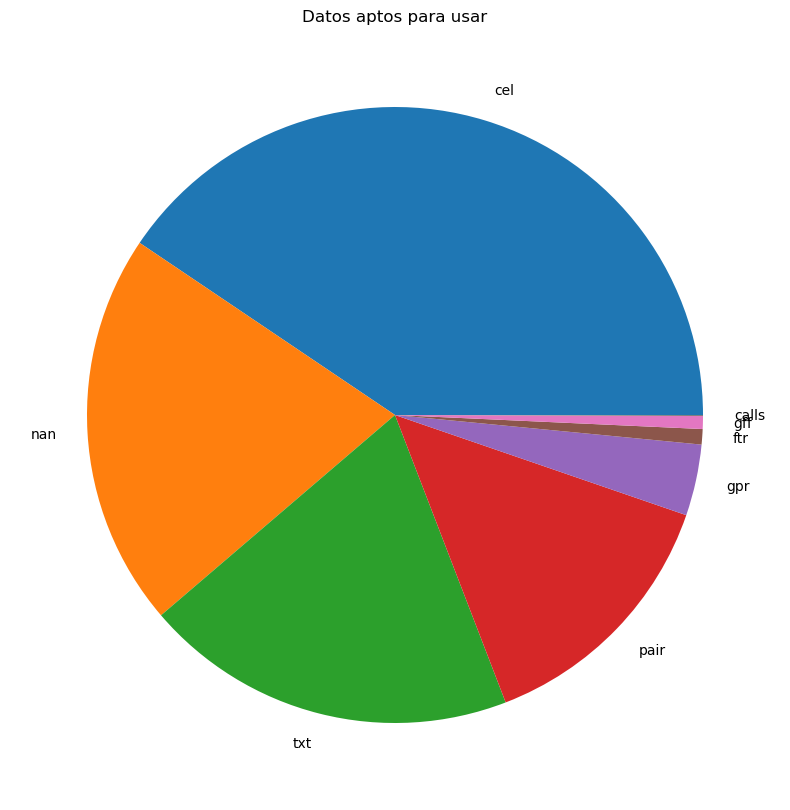

extension
cel      1508
NaN       770
txt       728
pair      516
gpr       139
ftr        30
gff        25
calls       2
Name: count, dtype: int64


In [149]:

plt.figure(figsize=(10,10))
(conteo := df.extension.value_counts(dropna=False)).plot.pie()
plt.xlabel('')
plt.ylabel('')
plt.title('Datos aptos para usar')
plt.show()

print(conteo)

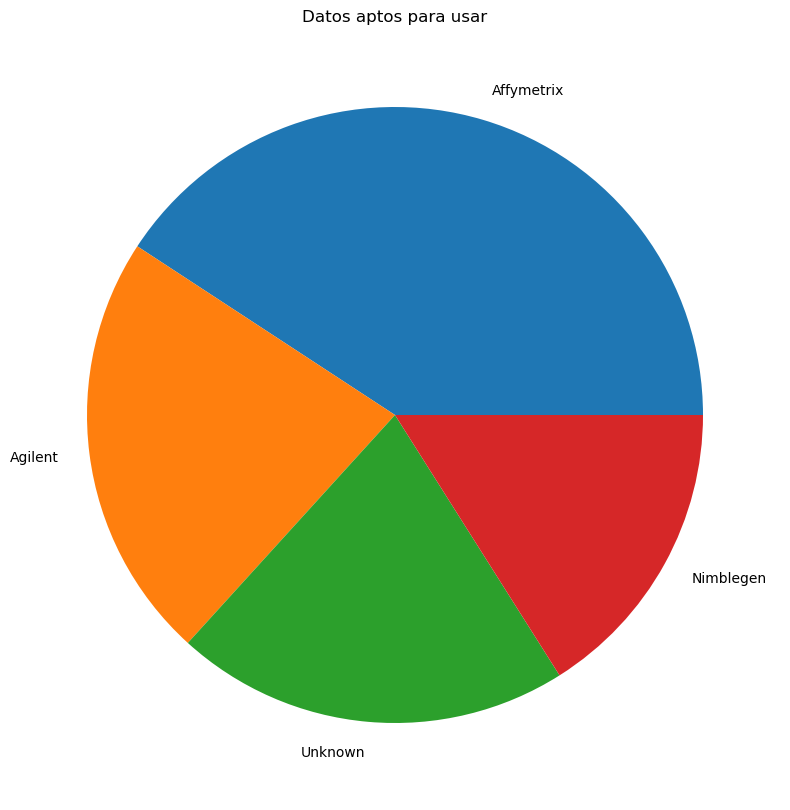

manufacturer
Affymetrix    1516
Agilent        836
Unknown        770
Nimblegen      596
Name: count, dtype: int64


In [151]:
plt.figure(figsize=(10,10))
conteo = df.manufacturer.fillna("Unknown").value_counts()
conteo.plot.pie()
plt.xlabel('')
plt.ylabel('')
plt.title('Datos aptos para usar')
plt.show()

print(conteo)

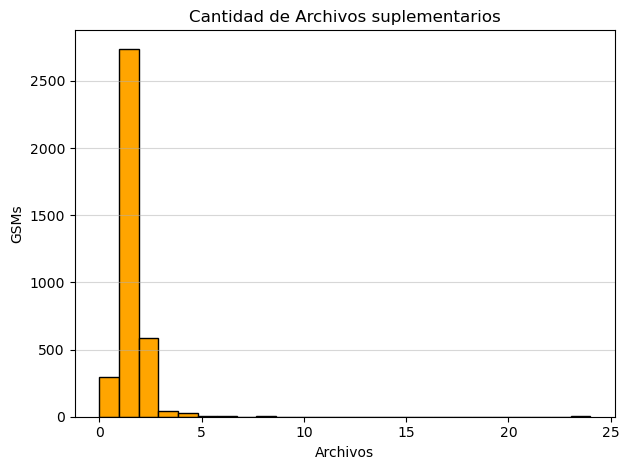

In [144]:
df.suplementary_files_number.plot.hist(bins=25, edgecolor='black', color='orange')

plt.title('Cantidad de Archivos suplementarios')
plt.xlabel('Archivos')
plt.ylabel('GSMs')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

### Exportar DataFrame

In [155]:
df

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_web_link,biomaterial_provider_ch1,biomaterial_provider_ch2,technology,valid_ch1_2,has_suplementary_file,suplementary_files_number,path,manufacturer,extension
GSM6262951,[ChrS-Ala245fs_vs_WT_1],[GSM6262951],[Public on Jul 22 2022],[Jun 23 2022],[Jul 22 2022],[RNA],[2],[ChrS-Ala245fs_4uM_hemin],[Corynebacterium glutamicum],[1718],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Agilent,gpr
GSM6262952,[ChrS-Ala245fs_vs_WT_2],[GSM6262952],[Public on Jul 22 2022],[Jun 23 2022],[Jul 22 2022],[RNA],[2],[ChrS-Ala245fs_4uM_hemin],[Corynebacterium glutamicum],[1718],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Agilent,gpr
GSM6262953,[ChrS-Ala245fs_vs_WT_3],[GSM6262953],[Public on Jul 22 2022],[Jun 23 2022],[Jul 22 2022],[RNA],[2],[ChrS-Ala245fs_4uM_hemin],[Corynebacterium glutamicum],[1718],...,NaN,NaN,NaN,True,True,True,1.0,NaN,Agilent,gpr
GSM8782701,[Response of the parental JU15 strain during t...,[GSM8782701],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the parental strain JU15 a...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
GSM8782702,[Response of the parental JU15 strain during t...,[GSM8782702],[Public on May 29 2025],[Feb 07 2025],[May 29 2025],[RNA],[2],[Control samples of the parental strain JU15 a...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM18285,[anaerobic_soxS_rep3],[GSM18285],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of soxS knock-out strain on ...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18285/suppl/GSM18285.C...,Affymetrix,cel
GSM18286,[anaerobic_wild_rep1],[GSM18286],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18286/suppl/GSM18286.C...,Affymetrix,cel
GSM18287,[anaerobic_wild_rep2],[GSM18287],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18287/suppl/GSM18287.C...,Affymetrix,cel
GSM18288,[anaerobic_wild_rep3],[GSM18288],[Public on Mar 10 2004],[Mar 04 2004],[Aug 01 2011],[RNA],[1],[anaerobic growth of wild-type strain on M9 me...,[Escherichia coli],[562],...,NaN,NaN,NaN,True,True,True,1.0,geo/samples/GSM18nnn/GSM18288/suppl/GSM18288.C...,Affymetrix,cel


In [156]:
df.to_csv("Results/e_coli_k12_microarrays_withpaths.tsv",sep="\t") # Ya el DF filtrado